In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyximport; pyximport.install(setup_args={'include_dirs': np.get_include()})
from jacobi import jacobi
% matplotlib inline

In [2]:
def init_phi_vars(x_min, x_max, y_min, y_max, t_0, t_max, NX, NY, tau):
    delta_x = (x_max - x_min) / (NX - 1)
    delta_y = (y_max - y_min) / (NY - 1)
    xs = np.arange(x_min, x_max + delta_x, delta_x)
    ys = np.arange(y_min, y_max + delta_y, delta_y)
    ts = np.arange(t_0, t_max, tau)
    return xs, ys, ts, delta_x, delta_y

In [3]:
def init_phi(lambda_x, lambda_y, xs, ys, ts, phi_0=1):
    num_steps = len(ts)
    NX = len(xs)
    NY = len(ys)
    phi = np.zeros((num_steps, NX, NY), dtype=np.float32)
    # t = 0 condition
    xx, yy = np.meshgrid(xs, ys)
    phi[0, :, :] = phi_0 * np.cos(np.pi * xx) * np.sin(np.pi * yy)
    # y = 0, 1 condition
    phi[:, :, 0] = 0
    phi[:, :, NY - 1] = 0
    # x = 0, 1 condition
    yy, tt = np.meshgrid(ys, ts)
    phi[:, 0 , :] = phi_0 * np.sin(np.pi * yy) * np.exp(-(lambda_x + lambda_y) * (np.pi**2) * tt)
    phi[:, NX - 1 , :] = - phi_0 * np.sin(np.pi * yy) * np.exp(-(lambda_x + lambda_y) * (np.pi**2) * tt)
    return phi

In [4]:
def true_phi(xs, ys, ts, lambda_x, lambda_y, phi_0=1):
    xx, tt, yy = np.meshgrid(xs, ts, ys)
    true_phi = phi_0 * np.cos(np.pi * xx) * np.sin(np.pi * yy) * np.exp(-(lambda_x + lambda_y) * (np.pi**2) * tt)
    return true_phi

In [5]:
NX, NY = 100, 100
t_0, t_max, tau = 0, 10, 1e-2
x_min, x_max, y_min, y_max = 0, 1, 0, 1
alphas = np.array([1, 2, 5, 10, 100])
lambda_x = 1e-2
lambda_ys =alphas * lambda_x

In [6]:
num_iters=1000

In [6]:
xs, ys, ts, delta_x, delta_y = init_phi_vars(x_min, x_max, y_min, y_max, t_0, t_max, NX, NY, tau)

In [16]:
for lambda_y in lambda_ys:
    print("Phi init")
    phi = init_phi(lambda_x, lambda_y, xs, ys, ts)
    print('Running Jacobi')
    jacobi(lambda_x, lambda_y, phi, num_iters, delta_x, delta_y, tau)
    print('Calculating true phi')
    true_phi_ = true_phi(xs, ys, ts, lambda_x, lambda_y)
    print('Calculating MSE')
    avg_mse = np.sqrt(np.average((true_phi_ - phi) ** 2))
    print('Lambda_y: {}. Average MSE between phi and true phi: {}'.format(lambda_y, avg_mse)) 

Phi init
Running Jacobi
Calculating true phi
Calculating MSE
Lambda_y: 0.0001. Average MSE between phi and true phi: 0.6448257456085883
Phi init
Running Jacobi
Calculating true phi
Calculating MSE
Lambda_y: 0.0002. Average MSE between phi and true phi: 0.6316917535184536
Phi init
Running Jacobi
Calculating true phi
Calculating MSE
Lambda_y: 0.0005. Average MSE between phi and true phi: 0.603219916668417
Phi init
Running Jacobi
Calculating true phi
Calculating MSE
Lambda_y: 0.001. Average MSE between phi and true phi: 0.568596870083465
Phi init
Running Jacobi
Calculating true phi
Calculating MSE
Lambda_y: 0.01. Average MSE between phi and true phi: 0.34390611633550455


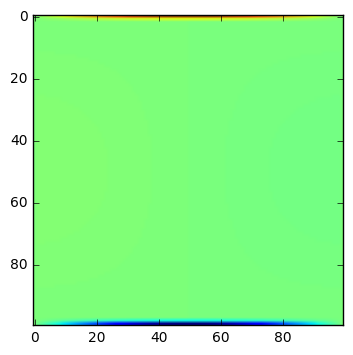

In [19]:
plt.imshow(phi[])

In [13]:
lambda_x =1e-4
lambda_y = lambda_x
print("Phi init")
phi = init_phi(lambda_x, lambda_y, xs, ys, ts)
print('Running Jacobi')
jacobi(lambda_x, lambda_y, phi, 1, delta_x, delta_y, tau)
print('Calculating true phi')
true_phi_ = true_phi(xs, ys, ts, lambda_x, lambda_y)
print('Calculating MSE')
avg_mse = np.sqrt(np.average((true_phi_ - phi) ** 2))
print('Lambda_y: {}. Average MSE between phi and true phi: {}'.format(lambda_y, avg_mse)) 

Phi init
Running Jacobi
Abs error: -9.309346696295684e-12
Abs error: 1.5515578405400632e-11
Abs error: -6.206231275424079e-12
Abs error: -1.2412462550848158e-11
Abs error: 0.0
Abs error: 1.5515578405400632e-11
Abs error: -1.2412462550848158e-11
Abs error: 1.2412462550848158e-11
Abs error: -1.5515578188560197e-12
Abs error: -1.086090505725279e-11
Abs error: -4.654673348147842e-12
Abs error: 1.5515578188560197e-12
Abs error: 1.5515578188560197e-12
Abs error: 1.086090505725279e-11
Abs error: 1.8618693392591368e-11
Abs error: 9.309346696295684e-12
Abs error: 7.757789202700316e-12
Abs error: -1.3964020044443526e-11
Abs error: -1.5515578188560197e-12
Abs error: -1.2412462550848158e-11
Abs error: 9.309346696295684e-12
Abs error: -4.654673348147842e-12
Abs error: 1.086090505725279e-11
Abs error: 9.309346696295684e-12
Abs error: -1.5515578188560197e-12
Abs error: 6.206231275424079e-12
Abs error: 3.878894601350158e-12
Abs error: -9.309346696295684e-12
Abs error: -1.5515578188560197e-12
Abs error

In [10]:
phi[5, 50, :]

array([ 0.        ,  0.95300245,  0.99644512,  0.99521887,  0.99173141,
        0.98721719,  0.98170823,  0.97521049,  0.96773118,  0.95927745,
        0.94985765,  0.93948144,  0.92815924,  0.91590232,  0.90272349,
        0.88863558,  0.87365311,  0.85779077,  0.84106457,  0.82349157,
        0.80508953,  0.78587687,  0.76587278,  0.74509722,  0.72357148,
        0.70131719,  0.67835701,  0.65471375,  0.63041091,  0.60547364,
        0.57992667,  0.55379564,  0.52710694,  0.49988768,  0.47216493,
        0.44396684,  0.41532153,  0.38625821,  0.35680595,  0.32699445,
        0.29685372,  0.26641399,  0.23570594,  0.20476063,  0.17360915,
        0.14228286,  0.11081329,  0.07923213,  0.04757123,  0.0158624 ,
       -0.0158624 , -0.04757123, -0.07923213, -0.11081329, -0.14228286,
       -0.17360917, -0.20476063, -0.23570594, -0.26641399, -0.29685372,
       -0.32699445, -0.35680595, -0.38625821, -0.41532153, -0.44396684,
       -0.47216493, -0.49988768, -0.52710694, -0.55379564, -0.57